In [1]:
!unzip Emirhan_Data_Set.zip

Archive:  Emirhan_Data_Set.zip
   creating: Test/
   creating: Test/Testt/
Test/Testt/Kağıthane.jpg:  mismatching "local" filename (Test/Testt/Ka─Я─▒thane.jpg),
         continuing with "central" filename version
  inflating: Test/Testt/Kağıthane.jpg  
Test/Testt/Mecidiyeköy-Şişli.jpg:  mismatching "local" filename (Test/Testt/Mecidiyek├╢y-┼Юi┼Яli.jpg),
         continuing with "central" filename version
  inflating: Test/Testt/Mecidiyeköy-Şişli.jpg  
Test/Testt/Mecidiyeköy-Şişli2.jpg:  mismatching "local" filename (Test/Testt/Mecidiyek├╢y-┼Юi┼Яli2.jpg),
         continuing with "central" filename version
  inflating: Test/Testt/Mecidiyeköy-Şişli2.jpg  
Test/Testt/Taksim-Beyoğlu.jpg:  mismatching "local" filename (Test/Testt/Taksim-Beyo─Яlu.jpg),
         continuing with "central" filename version
  inflating: Test/Testt/Taksim-Beyoğlu.jpg  
Test/Testt/Taksim-Beyoğlu2.jpg:  mismatching "local" filename (Test/Testt/Taksim-Beyo─Яlu2.jpg),
         continuing with "central" filename versi

In [126]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.1,
    dtype=None)
train_generator = train_datagen.flow_from_directory("Datas/",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",
                                                    subset="training")
test_generator = train_datagen.flow_from_directory("Datas/",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",
                                                    subset="validation")

Found 646 images belonging to 3 classes.
Found 71 images belonging to 3 classes.


In [149]:
from keras.backend import sigmoid
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import Sequential
model = Sequential(name="Emirhan_Istanbul_District_Recognition_with_Artificial_Intelligence")

model.add(Conv2D(256,2,2,padding="valid",input_shape=(128,128,3)))
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(256,2,2,padding="valid",input_shape=(128,128,3)))
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(256,2,2,padding="valid",input_shape=(128,128,3)))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(256,2,2,padding="valid",input_shape=(128,128,3)))
model.add(SpatialDropout2D(0.2))
model.add(LeakyReLU())
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(2))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(512,2,2,padding="valid"))
model.add(Conv2D(512,2,2,padding="valid"))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(1024,2,2,padding="valid"))
model.add(Conv2D(1024,2,2,padding="valid"))
model.add(Conv2D(1024,2,2,padding="valid"))
model.add(LeakyReLU())
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(2048,2,padding="valid"))
model.add(Conv2D(2048,2,padding="valid"))
model.add(Conv2D(2048,2,padding="valid"))
model.add(Conv2D(2048,2,padding="valid"))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(1024,2,padding="valid"))
model.add(MaxPool2D(2))
model.add(Conv2D(1024,2,padding="valid"))
model.add(Conv2D(1024,2,padding="valid"))
model.add(MaxPool2D(2))
model.add(Conv2D(1024,2,padding="valid"))
model.add(PReLU())
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(3))

model.add(Flatten())

model.add(Dense(64))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(3,activation="tanh"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [150]:
model.fit(train_generator,
          validation_data=test_generator,
          batch_size=128,
          validation_batch_size=128,
          epochs=64,
          shuffle=True,
          callbacks=[keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")])

Epoch 1/64
6/6 [==============================] - 2s 193ms/step - loss: 1.8395 - accuracy: 0.3839 - val_loss: 0.6382 - val_accuracy: 0.6901
Epoch 2/64
6/6 [==============================] - 1s 149ms/step - loss: 0.8155 - accuracy: 0.6269 - val_loss: 1.0144 - val_accuracy: 0.6479
Epoch 3/64
6/6 [==============================] - 1s 150ms/step - loss: 0.7603 - accuracy: 0.6656 - val_loss: 1.0211 - val_accuracy: 0.6761
Epoch 4/64
6/6 [==============================] - 1s 152ms/step - loss: 0.5929 - accuracy: 0.7632 - val_loss: 0.9864 - val_accuracy: 0.4366
Epoch 5/64
6/6 [==============================] - 1s 152ms/step - loss: 0.5224 - accuracy: 0.8003 - val_loss: 1.1078 - val_accuracy: 0.4366
Epoch 6/64
6/6 [==============================] - 1s 149ms/step - loss: 0.4736 - accuracy: 0.7988 - val_loss: 0.9999 - val_accuracy: 0.4507
Epoch 7/64
6/6 [==============================] - 1s 152ms/step - loss: 0.4608 - accuracy: 0.8204 - val_loss: 0.9367 - val_accuracy: 0.5211
Epoch 8/64
6/6 [====

In [145]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
validation_generator = test_datagen.flow_from_directory("testt/",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

Found 5 images belonging to 3 classes.


In [214]:
from tensorflow.keras.models import load_model
model = load_model("/content/model/model_39.h5")

In [243]:
model.evaluate(train_generator)

6/6 [==============================] - 1s 122ms/step - loss: 0.0331 - accuracy: 0.9845


[0.03307473286986351, 0.9845201373100281]

In [242]:
model.evaluate(test_generator)

1/1 [==============================] - 0s 119ms/step - loss: 0.0188 - accuracy: 1.0000


[0.018797287717461586, 1.0]

In [215]:
model.evaluate(validation_generator)

1/1 [==============================] - 1s 623ms/step - loss: 0.1646 - accuracy: 1.0000


[0.1646277904510498, 1.0]

In [226]:
from keras.preprocessing.image import ImageDataGenerator

predict_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
predict_generator = predict_datagen.flow_from_directory("fotoo/",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

Found 1 images belonging to 1 classes.


In [227]:
prediction(model,predict_generator)

Predicted District is Taksim-Beyoğlu!


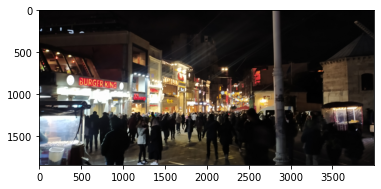

In [224]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/fotoo/fot/Taksim-Beyoğlu.jpg")
plt.imshow(im)
plt.show()

In [228]:
from keras.preprocessing.image import ImageDataGenerator

predict_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
predict_generator = predict_datagen.flow_from_directory("fotoo/",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

Found 1 images belonging to 1 classes.


In [229]:
prediction(model,predict_generator)

Predicted District is Mecidiyeköy-Şişli!


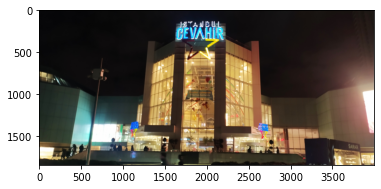

In [230]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/fotoo/fot/Mecidiyeköy-Şişli2.jpg")
plt.imshow(im)
plt.show()

In [231]:
from keras.preprocessing.image import ImageDataGenerator

predict_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
predict_generator = predict_datagen.flow_from_directory("fotoo/",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

Found 1 images belonging to 1 classes.


In [232]:
prediction(model,predict_generator)

Predicted District is Mecidiyeköy-Şişli!


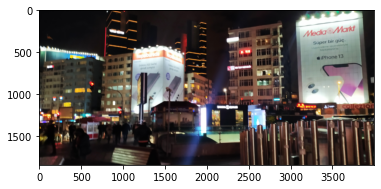

In [233]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/fotoo/fot/Mecidiyeköy-Şişli.jpg")
plt.imshow(im)
plt.show()

In [234]:
from keras.preprocessing.image import ImageDataGenerator

predict_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
predict_generator = predict_datagen.flow_from_directory("fotoo/",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

Found 1 images belonging to 1 classes.


In [235]:
prediction(model,predict_generator)

Predicted District is Kağıthane!


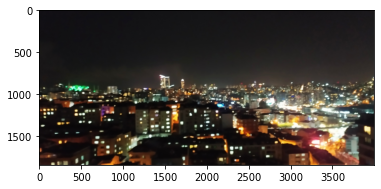

In [236]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("/content/fotoo/fot/Kağıthane.jpg")
plt.imshow(im)
plt.show()

In [237]:
from keras.preprocessing.image import ImageDataGenerator

predict_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
predict_generator = predict_datagen.flow_from_directory("fotoo/",target_size=(128, 128),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="nearest",)

Found 1 images belonging to 1 classes.


In [238]:
prediction(model,predict_generator)

Predicted District is Taksim-Beyoğlu!


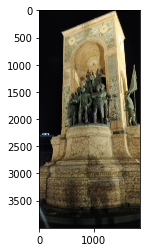

In [241]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/fotoo/fot/Taksim-Beyoğlu2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()